In [11]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 10.3 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=40bf18e66f2eafe03b802a5674c3642404e4f7ac9edc77b9ce49838c225d73de
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [12]:
import pandas as pd
from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError
#import requests
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime,timedelta
import yfinance as yf


# Importar datos

In [13]:
START_DATE = (datetime.now()-timedelta(50)).strftime('%Y-%m-%d')
END_DATE = datetime.now().strftime('%Y-%m-%d')
STOCK = 'AMZN'

def get_data(ticker):
  try:
    tickerData = yf.Ticker(STOCK)
    stock_data=tickerData.history(period='1d', start=START_DATE, end=END_DATE) 
  except RemoteDataError:
    print('No data found for {t}'.format(t=ticker))
  return stock_data


In [14]:
df=get_data(STOCK)
df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-06-08,3222.610107,3279.530029,3218.010010,3264.110107,3416700,0,0
2021-06-09,3272.870117,3297.580078,3270.699951,3281.149902,2455500,0,0
2021-06-10,3282.010010,3351.000000,3281.149902,3349.649902,3476500,0,0
2021-06-11,3349.649902,3366.580078,3333.449951,3346.830078,2817400,0,0
2021-06-14,3346.830078,3385.000000,3335.500000,3383.870117,2569700,0,0


# Transformaciòn de los datos y calculo indicadores


In [ ]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,1802.590081,1773.117302,1788.746190,1789.189206,3.867974e+06,1789.189206
std,100.539397,103.057753,102.932941,101.313650,1.614055e+06,101.313650
min,1538.000000,1460.930054,1465.199951,1500.280029,8.813000e+05,1500.280029
25%,1747.589966,1718.234985,1736.189972,1735.845032,2.778875e+06,1735.845032
50%,1798.375000,1773.700012,1789.135010,1786.450012,3.475800e+06,1786.450012
75%,1868.277527,1836.732544,1848.475006,1855.319946,4.634700e+06,1855.319946
max,2035.800049,2003.869995,2025.619995,2020.989990,1.150620e+07,2020.989990


In [ ]:
def media_movil(num,df,column):
  df['media_{}_{}'.format(column,num)]=df[column].rolling(window=int(num),min_periods=1).mean()
  return df

In [ ]:
medias=['20','50']
for m in medias:
  df=media_movil(m,df,'Close')


In [ ]:
df['diff']=df.Close.diff(periods=1)
df.dropna(inplace=True)
df['sub']=df['diff'][df['diff']>0]
df['baj']=abs(df['diff'][df['diff']<=0])
df.fillna(value=0,inplace=True)
df['media_sub_14']=df['sub'].rolling(window=14).mean()
df['media_baj_14']=df['baj'].rolling(window=14).mean()
df['RSI']=100-(100/(1+(df.media_sub_14/df.media_baj_14)))
df.dropna(inplace=True)
df.drop(columns=['diff','sub','baj','media_sub_14','media_baj_14'],inplace=True)

In [ ]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close,media_Close_20,media_Close_50,RSI
count,238.000000,238.000000,238.000000,238.000000,2.380000e+02,238.000000,238.000000,238.000000,238.000000
mean,1811.505169,1783.058361,1798.500293,1798.409453,3.702325e+06,1798.409453,1791.962927,1783.139299,53.793841
std,95.434561,95.936093,96.029208,95.652391,1.466915e+06,95.652391,91.281550,88.315859,16.483287
min,1588.589966,1566.760010,1586.000000,1588.219971,8.813000e+05,1588.219971,1629.176996,1632.950008,11.435333
25%,1760.930054,1731.839996,1748.015015,1745.577515,2.746750e+06,1745.577515,1749.551762,1722.380944,42.453430
50%,1801.739990,1779.174988,1793.420044,1791.049988,3.344500e+06,1791.049988,1790.590247,1778.746097,53.923973
75%,1871.322479,1843.332520,1852.462463,1859.502533,4.440650e+06,1859.502533,1852.517128,1863.904099,66.150970
max,2035.800049,2003.869995,2025.619995,2020.989990,1.150620e+07,2020.989990,1974.205005,1900.100801,93.650450


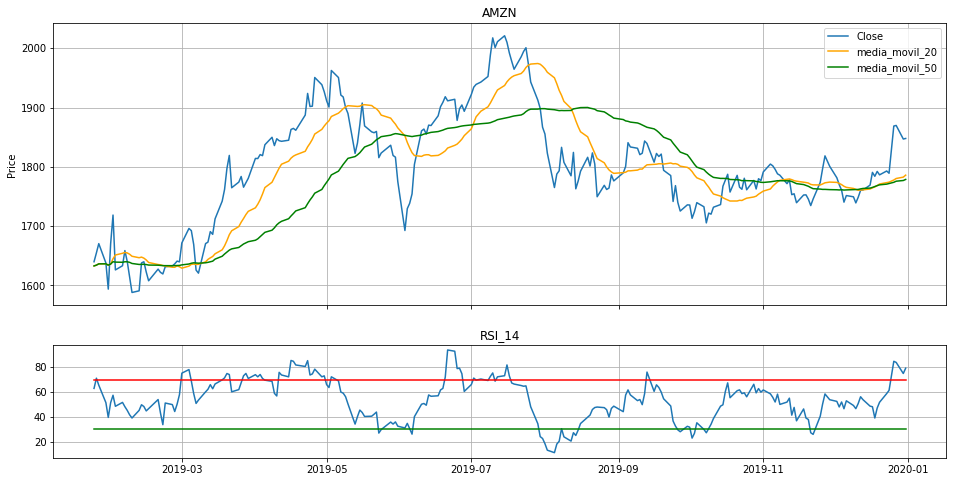

In [ ]:
# using the variable ax for single a Axes
fig, ax = plt.subplots(2,1,sharex=True,gridspec_kw={'height_ratios': [2.5, 1]}, figsize=(16,8))


ax[0].plot(df.Close)
ax[0].plot(df.media_Close_20,'orange')
ax[0].plot(df.media_Close_50,'g')
ax[0].set_title(STOCK)
ax[0].set_ylabel('Price')
ax[0].legend(['Close','media_movil_20','media_movil_50'])
ax[0].grid(True)


ax[1].plot(df.RSI)
ax[1].plot(df.index,70*np.ones(df.shape[0]),'r')
ax[1].plot(df.index,30*np.ones(df.shape[0]),'g')
ax[1].set_title('RSI_14')
ax[1].grid(True)




plt.show()
